# 3.2.5 - K-Nearest Neighbors


* En este Notebook vamos a ver el Algoritmo de Aprendizaje (basado en memoria) ***K-Nearest Neighbors para la Clasificación*** y vamos a ***resolver un problema de clasificación usando*** la implementación de este Algoritmo de Aprendizaje con la ***librería de scikit-learn***.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [K-Nearest Neighbors](#M1)
<span></span><br>
    2. [Ejemplo de Clasificación con K-Nearest Neighbors (3 Clases): Clasificación de tipos de flores](#M2)
    <span></span><br>
        2.1. [Carga de datos](#M21)
    <span></span><br>
        2.2. [Cambio de estructura de datos a numpy y transformación de las etiquetas a números](#M22)
    <span></span><br>
        2.3. [Visualización de los datos](#M23)
    <span></span><br>
        2.4. [Creacción y ajuste de los modelos](#M24)
    <span></span><br>
        2.5. [Evaluación de los modelos](#M25)
    <span></span><br>
        2.6. [Visualización de los resultados](#M26)


## <a name="M1">1. K-Nearest Neighbors</a>


* El ***K-Nearest Neighbors (K-nn) es un Algoritmo de Aprendizaje basado en memoria*** que aplicado a problemas de Clasificación, ***clasifica un nuevo elemento en función de la clase mayoritaria a la que pertenezcan los elementos*** (del conjunto de datos de entrenamiento) ***más similares a él***.


* Supongamos el siguiente caso en el que tenemos en nuestro Dataset un conjunto de elementos de dos clases (una verde y otra roja) y queremos predecir a que clase va a pertenecer el nuevo elemento pintado de color azul:


<img src="../../imgs/3_02_05_01_knn.png" style="width: 300px;"/>


* El Algoritmo de Aprendizaje del ***K-nn calculará con alguna medida de similaridad, la similaridad entre el nuevo elemento de color azul con el resto de elementos del Dataset y seleccionará los 'K' elementos más similares a él***. ***Sabiendo las clases de los 'K' elementos mas similares al nuevo elemento, se le asignará la clase predominante***.


* Siguiendo el ejemplo anterior, si seleccionamos los 5 elementos más similares (cercanos) (K=5) al nuevo elemento, tenemos lo siguiente:

<img src="../../imgs/3_02_05_02_knn.png" style="width: 300px;"/>


* Para K=5, podemos ver como 2 elementos son de la clase verde y 3 elementos son de la clase roja, por lo que clasificaremos al nuevo elemento como un elemento de la clase roja.

<img src="../../imgs/3_02_05_03_knn.png" style="width: 300px;"/>


* Uno de los ***elementos fundamentales del Algoritmo de Aprendizaje K-nn, es la métrica de similaridad*** a usar para calcular las similaridades entre los puntos, siendo las más usadas las siguientes:
<span></span><br><br>
    - ***Distancia Euclidea***:
    
    $$d(x,x_{new}) = \sqrt{\sum_{i=1}^{N}(x^{(i)} - x^{(i)}_{new})}$$
<span></span><br><br>    
    - ***Coseno***: 
    
    $$Cos(x,x_{new}) = \frac{\sum_{i=1}^{N}x^{(i)} \cdot x^{(i)}_{new}}{\sqrt{\sum_{i=1}^{N}(x^{(i)})^2 } \cdot {\sqrt{\sum_{i=1}^{N}(x^{(i)}_{new})^2 }}}$$
<span></span><br><br>    
    - ***Correlación***:
    
    $$Corr(x,x_{new}) = \frac{\sum_{i=1}^{N}(x^{(i)} - \overline{x})\cdot(x^{(i)}_{new} - \overline{x_{new}})}{\sqrt{\sum_{i=1}^{N} (x^{(i)} - \overline{x})^2} \cdot \sqrt{\sum_{i=1}^{N} (x^{(i)}_{new} - \overline{x})^2_{new}}}$$


### ¿Cómo sabemos el número de vecinos óptimo? 


* El K-nn necesita saber a priori cual es el número de vecinos ('K') para calcular las predicciones y este valor puede condicionar mucho la calidad de las predicciones realizadas.


* ***No existe una norma para asignar un valor óptimo de vecinos 'K' y este debe de obtenerse tras realizar varias ejecuciones del K-nn con diferetes valores de 'K' y evaluar su rendimiento***, viendo los errores cometidos con el conjunto de datos de entrenamiento y test.


* Lo que si podemos concluir de los valores de 'K' es lo siguiente:
<span></span><br><br>
    - ***K = Nº de elementos del Dataset***: De esta manera tenemos el modelo más simple de todos y asignará a un nuevo elemento la clase mayoritaría del Dataset.
<span></span><br><br>
    - ***K = Valor Alto:*** Cuanto mayor sea 'K' menos complejo será nuestro modelo. Con valores altos de 'K' no conseguimos definir bien las fronteras de decisión entre las clases por lo que tendremos un modelo con Underfitting.
<span></span><br><br>
    - ***K = Valor Bajo:*** Cuanto menor ser 'K' más complejo será nuestro modelo. Con valores muy bajos de 'K' definimos muchísimas fronteras de decisión por lo que tendremos un modelo con Overfitting.
<span></span><br><br>
    - ***K = 1:*** De esta manera estamos generando el modelo más complejo posible.


### Pros y Contras del K-Nearest Neighbors


* El K-Nearest Neighbors es un Algoritmo de Aprendizaje que es ***muy simple de entender, implementar y utilizar*** y que además ***ofrece muy buenos resultado si se elige bien el número de vecinos 'K' y la métrica de similaridad*** a utilizar.


* Sin embargo es un Algoritmo de Aprendizaje que requiere de ***mucho tiempo de computo*** ya que tiene que calcular para cada elemento la similaridad con el resto de elementos y en los casos que tengamos un conjunto de datos muy grande tendrá que realizar muchisimos cálculos de similaridad para obtener los vecinos más similares.



<hr>


## <a name="M2">2. Ejemplo de Clasificación con K-nn (3 Clases): Clasificación de tipos de flores</a>


* En el siguiente ejemplo vamos a resolver un problema de clasificación que consiste en ***clasificar los tipos de flores, conociendo el tamaños del sépalo*** de la flor.


* Para resolver el problema de Clasificación vamos a utilizar la clase **"KNeighborsClassifier()"** de la librería de Scikit-Learn, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


* El problema lo vamos a resolver utilizando diferentes números de vecinos: 1, 2, 3, 5, 10 y 20 vecinos.


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    2.1. [Carga de datos](#M21)
<span></span><br>
    2.2. [Cambio de estructura de datos a numpy y transformación de las etiquetas a números](#M22)
<span></span><br>
    2.3. [Visualización de los datos](#M23)
<span></span><br>
    2.4. [Creacción y ajuste de los modelos](#M24)
<span></span><br>
    2.5. [Evaluación de los modelos](#M25)
<span></span><br>
    2.6. [Visualización de los resultados](#M26)


* En primer lugar vamos a importar las librería necesarias:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
%matplotlib inline 

<hr>


### <a name="M21">2.1. Carga de datos</a>

* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "../../data/iris/iris.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas que nos interesan para el problema a resolver
    - ***class***: Clase de la flor (Iris-versicolor, Iris-setosa)
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo


In [2]:
df = pd.read_csv("../../data/iris/iris.csv")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
144,6.7,3.3,5.7,2.5,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
12,4.8,3.0,1.4,0.1,Iris-setosa
67,5.8,2.7,4.1,1.0,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica


<hr>


### <a name="M22">2.2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números</a>

* Las ***columnas sepal_length y sepal_width*** representan las variables de entrada y las vamos a pasar a un array de array (***numpy array***)


* La ***columna class*** que representa la clase (o variable de salida) y la vamos a pasar a un ***numpy array***
    
    
* Por otro lado tenemos que transformar la clase de la flor a números, por lo que utilizaremos la clase ***LabelEncoder()*** para transformar las etiquetas de las clases a números:


In [3]:
X = df[['sepal_length', 'sepal_width']].values   # Obtengo el alto y ancho del sepalo
y_labels = df['class'].values                    # Obtengo las etiquetas


le = preprocessing.LabelEncoder()     # Instancio un objeto de la clase LabelEncoder()
y = le.fit_transform(y_labels)        # Transformo las etiquetas a números

<hr>


### <a name="M23">2.3. Visualización de los datos</a>


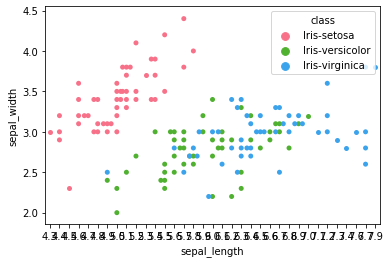

In [4]:
sns.swarmplot(x="sepal_length", y="sepal_width", hue="class", data = df, palette="husl")

<hr>


### <a name="M24">2.4. Creacción y ajuste de los modelos</a>


* Vamos a crearnos varios modelos utilizando diferente número de vecinos para los siguientes K: 1, 2, 3, 5, 10 y 20


* Por defecto el KNeighborsClassifier implementa como medida se similaridad la distancia euclidea.

In [5]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)
knn_50 = KNeighborsClassifier(n_neighbors=50)
knn_100 = KNeighborsClassifier(n_neighbors=100)
knn_150 = KNeighborsClassifier(n_neighbors=150)

clasificadores = {'Knn K=1': knn_1,
                  'Knn K=2': knn_2,
                  'Knn K=3': knn_3,
                  'Knn K=5': knn_5,
                  'Knn K=10': knn_10,
                  'Knn K=20': knn_20,
                  'Knn K=50': knn_50,
                  'Knn K=100': knn_100,
                  'Knn K=150': knn_150,}

# Ajustamos los modelos
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X, y)

CREANDO MODELO: Knn K=1
CREANDO MODELO: Knn K=2
CREANDO MODELO: Knn K=3
CREANDO MODELO: Knn K=5
CREANDO MODELO: Knn K=10
CREANDO MODELO: Knn K=20
CREANDO MODELO: Knn K=50
CREANDO MODELO: Knn K=100
CREANDO MODELO: Knn K=150


<hr>


### <a name="M25">2.5. Evaluación de los modelos</a>


* Para cada uno de los modelos vamos a calcular las siguientes métricas de evaluación:

    + Accuracy
    + F1
    + Precision
    + Recall

In [6]:
evaluacion = list()
for k, v in clasificadores.items():
    model = {}
    model['name'] = k
    y_pred = v.predict(X)
    model['accuracy'] = accuracy_score(y_true=y, y_pred=y_pred)
    model['precision'] = precision_score(y_true=y, y_pred=y_pred, average='weighted')
    model['recall'] = recall_score(y_true=y, y_pred=y_pred, average='weighted')
    model['f1'] = f1_score(y_true=y, y_pred=y_pred, average='weighted')
    evaluacion.append(model)

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

,accuracy,precision,recall,f1
name,,,,
Knn K=1,0.926667,0.926771,0.926667,0.926659
Knn K=2,0.873333,0.900347,0.873333,0.869564
Knn K=3,0.853333,0.856061,0.853333,0.852803
Knn K=5,0.833333,0.835033,0.833333,0.834125
Knn K=10,0.846667,0.847317,0.846667,0.846529
Knn K=20,0.793333,0.795866,0.793333,0.792316
Knn K=50,0.833333,0.831831,0.833333,0.832525
Knn K=100,0.726667,0.725895,0.726667,0.717481
Knn K=150,0.333333,0.111111,0.333333,0.166667


<hr>


### <a name="M26">2.6. Visualización de los resultados</a>


* A continuación pasamos a ver de namera visual como clasifica los elementos los diferentes modelos creados:

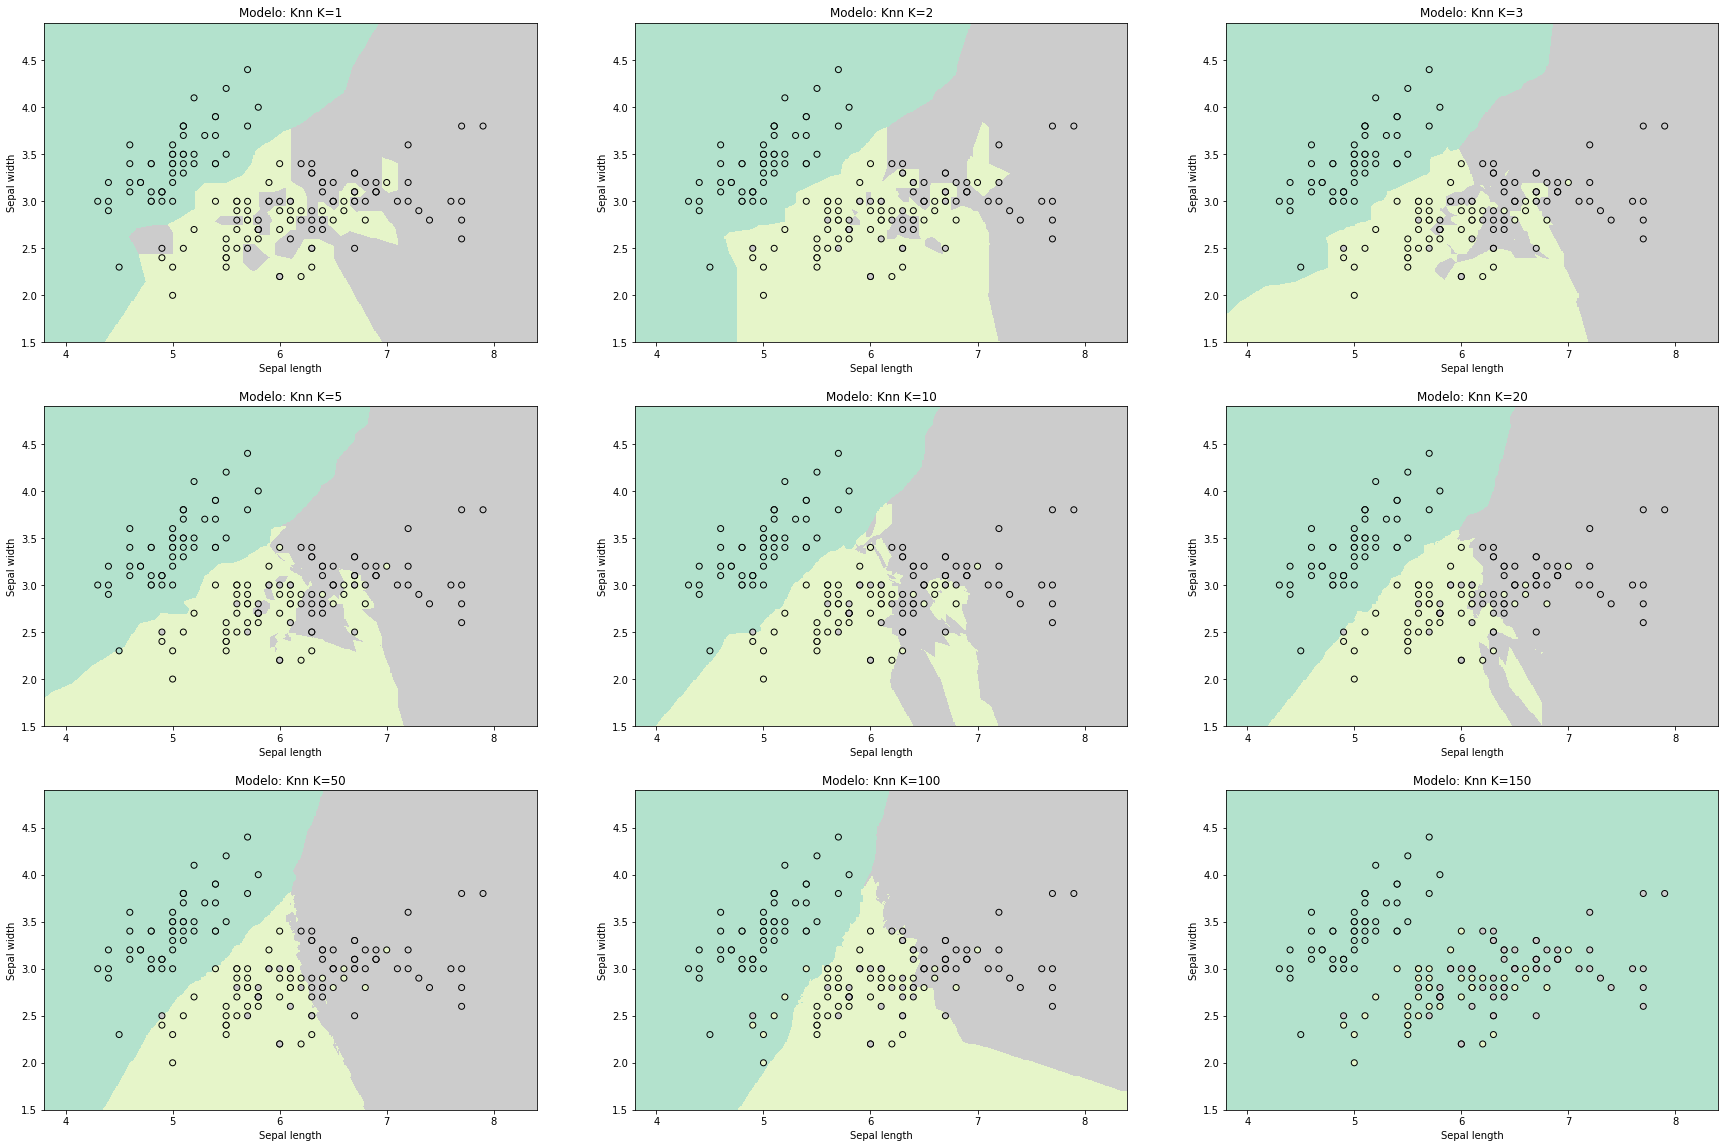

In [7]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(figsize=(30, 20))
i=0
for k, v in clasificadores.items():
    plt.subplot(3, 3, i+1)
    Z = v.predict(np.c_[xx.ravel(), yy.ravel()]) # Predicción de cada uno de los puntos de la malla
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)    # Dibujamos la malla con los diferentes colores
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Pastel2) # Dibujamos los puntos (flores) del dataset
    plt.title('Modelo: {}'.format(k))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    i +=1
plt.show()

<hr>


### <a name="M27">2.7. Selección del K óptimo: Número óptimo de vecinos</a>


* Para calcular un número adecuado de vecinos, vamos a ejecutar 30 K-nn para valores de K del 1 al 30 y miraremos el error cometido para los conjuntos de datos de entrenamiento y test.


* De esta manera seleccionaremos aquel valor de 'K' que tenga un cierto equilibrio entre el error cometido entre los conjuntos de datos de entrenamiento y test.


* Viendo estos errores, podemos seleccionar como valor de K=4, ya que con este valor cometemos un error bajo con el conjunto de datos de test y tiene un error también bajo en el conjunto de datos de entrenamiento aunque este error no sea el más bajo de los datos de entrenamiento.

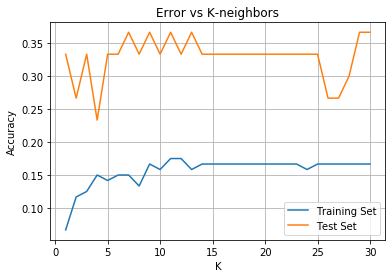

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

acc_train = list()
acc_test = list()
K = 30
for k in range(1,K+1 ,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_train = accuracy_score(y_true=y_train, y_pred=knn.predict(X_train))
    accuracy_test = accuracy_score(y_true=y_test, y_pred=knn.predict(X_test))
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)
    

fig, ax =  plt.subplots(figsize=(6, 4))
ax.plot([k for k in range(1,K+1,1)], [1-acc for acc in acc_train], label='Training Set')
ax.plot([k for k in range(1,K+1,1)], [1-acc for acc in acc_test], label='Test Set')
ax.set_title("Error vs K-neighbors")
ax.set_xlabel("K")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend(loc='down right')
plt.show()

<hr>


Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.


<img src="../../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">